# 14 Linear Algebra: String Problem
## Motivating problem: Two masses on three strings
Two masses $M_1$ and $M_2$ are hung from a horizontal rod with length $L$ in such a way that a rope of length $L_1$ connects the left end of the rod to $M_1$, a rope of length $L_2$ connects $M_1$ and $M_2$, and a rope of length $L_3$ connects $M_2$ to the right end of the rod. The system is at rest (in equilibrium under gravity).

![Schematic of the 1 rod/2 masses/3 strings problem.](1rod2masses3strings.png)

Find the angles that the ropes make with the rod and the tension forces in the ropes.

## Theoretical background
Treat $\sin\theta_i$ and $\cos\theta_i$ together with $T_i$, $1\leq i \leq 3$, as unknowns that have to simultaneously fulfill the nine equations
\begin{align}
-T_1 \cos\theta_1 + T_2\cos\theta_2 &= 0\\
 T_1 \sin\theta_1 - T_2\sin\theta_2 - W_1 &= 0\\
                   -T_2\cos\theta_2 + T_3\cos\theta_3 &= 0\\
                    T_2\sin\theta_2 + T_3\sin\theta_3 - W_2 &= 0\\
 L_1\cos\theta_1 + L_2\cos\theta_2 + L_3\cos\theta_3 - L &= 0\\
-L_1\sin\theta_1 -L_2\sin\theta_2 + L_3\sin\theta_3  &= 0\\
\sin^2\theta_1 + \cos^2\theta_1 - 1 &= 0\\
\sin^2\theta_2 + \cos^2\theta_2 - 1 &= 0\\
\sin^2\theta_3 + \cos^2\theta_3 - 1 &= 0
\end{align}

Consider the nine equations a vector function $\mathbf{f}$ that takes a 9-vector $\mathbf{x}$ of the unknowns as argument:
\begin{align}
\mathbf{f}(\mathbf{x}) &= 0\\
\mathbf{x} &= \left(\begin{array}{c}
x_0 \\ x_1 \\ x_2 \\ 
x_3 \\ x_4 \\ x_5 \\ 
x_6 \\ x_7 \\ x_8
\end{array}\right) =
\left(\begin{array}{c}
\sin\theta_1 \\ \sin\theta_2 \\ \sin\theta_3 \\
\cos\theta_1 \\ \cos\theta_2 \\ \cos\theta_3 \\
T_1 \\ T_2 \\ T_3
\end{array}\right) \\
\mathbf{L} &= \left(\begin{array}{c}
L \\ L_1 \\ L_2 \\ L_3
\end{array}\right), \quad
\mathbf{W} = \left(\begin{array}{c}
W_1 \\ W_2
\end{array}\right)
\end{align}

Using the unknowns from above, our system of 9 coupled equations is:

\begin{align}
-x_6 x_3 + x_7 x_4 &= 0\\
 x_6 x_0 - x_7 x_1 - W_1 &= 0\\
-x_7x_4 + x_8 x_5 &= 0\\
 x_7x_1 + x_8 x_2 - W_2 &= 0\\
 L_1x_3 + L_2 x_4 + L_3 x_5 - L &= 0\\
-L_1x_0 - L_2 x_1 + L_3 x_2  &= 0\\
x_{0}^{2} + x_{3}^{2} - 1 &= 0\\
x_{1}^{2} + x_{4}^{2} - 1 &= 0\\
x_{2}^{2} + x_{5}^{2} - 1 &= 0
\end{align}


Solve the root-finding problem $\mathbf{f}(\mathbf{x}) = 0$ with the **generalized Newton-Raphson** algorithm:

$$
\mathsf{J}(\mathbf{x}) \Delta\mathbf{x} = -\mathbf{f}(\mathbf{x})
$$

and 

$$
\mathbf{x} \leftarrow \mathbf{x} + \Delta\mathbf{x}.
$$

## Problem setup
Set the problem parameters and the objective function $\mathbf{f}(\mathbf{x})$

In [1]:
import numpy as np

# problem parameters
W = np.array([10, 20])
L = np.array([8, 3, 4, 4])

def f_2masses(x, L, W):
    return np.array([
            -x[6]*x[3] + x[7]*x[4],
             x[6]*x[0] - x[7]*x[1] - W[0],
            -x[7]*x[4] + x[8]*x[5],
             x[7]*x[1] + x[8]*x[2] - W[1],
             L[1]*x[3] + L[2]*x[4] + L[3]*x[5] - L[0],
            -L[1]*x[0] - L[2]*x[1] + L[3]*x[2],
            x[0]**2 + x[3]**2 - 1,
            x[1]**2 + x[4]**2 - 1,
            x[2]**2 + x[5]**2 - 1,
        ])

def fLW(x, L=L, W=W):
    return f_2masses(x, L, W)

### Initial values
Guess some initial values (they don't have to fullfil the equations!):

In [2]:
# initial parameters
#theta0 = np.deg2rad([45, 45, 90])
#T0 = np.array([1, 1, 2])
#x0 = np.concatenate([np.sin(theta0), np.cos(theta0), T0])

x0 = np.array([1.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 1, 1])

In [3]:
x0

array([1.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1. , 1. , 1. ])

In [4]:
f_2masses(x0, L, W)

array([  0. ,  -9. ,   0. , -19. ,  -2.5,  -4.5,   1.5,  -0.5,  -0.5])

### Visualization
Plot the positions of the 2 masses and the 3 strings for any solution vector $\mathbf{x}$:

In [5]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def plot_2masses(x, L, W, **kwargs):
    """Plot 2 mass/3 string problem for parameter vector x and parameters L and W"""
    
    kwargs.setdefault('linestyle', '-')
    kwargs.setdefault('marker', 'o')
    kwargs.setdefault('linewidth', 1)
    
    ax = kwargs.pop('ax', None)
    if ax is None:
        ax = plt.subplot(111)
    
    r0 = np.array([0, 0])
    r1 = r0 + np.array([L[0], 0])
    rod = np.transpose([r0, r1])
    
    L1 = r0 + np.array([L[1]*x[3], -L[1]*x[0]])
    L2 = L1 + np.array([L[2]*x[4], -L[2]*x[1]])
    L3 = L2 + np.array([L[3]*x[5], L[3]*x[2]])
    strings = np.transpose([r0, L1, L2, L3])
    
    ax.plot(rod[0], rod[1], color="black", marker="d", linewidth=4)
    ax.plot(strings[0], strings[1], **kwargs)
    ax.set_aspect(1)
    return ax

What does the initial guess look like?

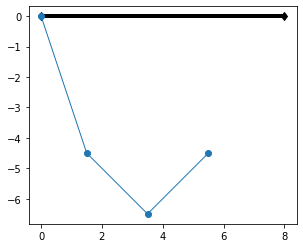

In [7]:
plot_2masses(x0, L, W)

## Jacobian 
Write a function `Jacobian(f, x, h=1e-5)` that computes the Jacobian matrix numerically (use the central difference algorithm).

\begin{align}
\mathbf{J} &= \frac{\partial \mathbf{f}}{\partial\mathbf{x}} \\
J_{ij} &= \frac{\partial f_i(x_1, \dots, x_j, \dots)}{\partial x_j} \\
       &\approx \frac{f_i(x_1, \dots, x_j + \frac{h}{2}, \dots) - f_i(x_1, \dots, x_j - \frac{h}{2}, \dots)}{h}
\end{align}

In [9]:
def Jacobian(f, x, h=1e-5):
    """df_i/dx_j with central difference (fi(xj+h/2)-fi(xj-h/2))/h"""
    J = np.zeros((len(f(x)), len(x)), dtype=np.float64)
    hvec = np.zeros_like(x, dtype=np.float64)
    for j in range(len(x)):
        hvec *= 0
        hvec[j] = 0.5*h
        J[:, j] = (f(x + hvec) - f(x - hvec))/h
    return J

Test `Jacobian()` on 
$$
\mathbf{g}(\mathbf{x}) = \begin{pmatrix}
  x_0^2 - x_1 \\ x_0
  \end{pmatrix}
$$
with analytical result

$$
\mathsf{J} = \left[\frac{\partial g_i}{\partial x_j}\right] =
\begin{pmatrix}
  \frac{\partial g_0}{\partial x_0} & \frac{\partial g_0}{\partial x_1}\\
  \frac{\partial g_1}{\partial x_0} & \frac{\partial g_1}{\partial x_1}
\end{pmatrix}
= 
\begin{pmatrix}
  2 x_0 & -1\\
  1 & 0
\end{pmatrix}
$$

Given a test vector $\mathbf{x}_\text{test} = (1, 0)$, what is the numerical answer for $\mathsf{J}(\mathbf{x}_\text{test})$?

$$
\mathsf{J}(\mathbf{x}_\text{test}) = \begin{pmatrix}
  2 & -1\\
  1 & 0
\end{pmatrix}
$$

Test your `Jacobian()` function with $\mathbf{x}_\text{test}$ and check that you get the same answer:

In [10]:
def g(x):
    return np.array([
            x[0]**2 - x[1],
            x[0]
        ])
x_test = np.array([1, 0])
J = Jacobian(g, x_test)
print(J)

[[ 2. -1.]
 [ 1.  0.]]


Test that it also works for our starting vector:

In [12]:
J0 = Jacobian(fLW, x0)
J0

array([[ 0. ,  0. ,  0. , -1. ,  1. ,  0. , -0.5,  0.5,  0. ],
       [ 1. , -1. ,  0. ,  0. ,  0. ,  0. ,  1.5, -0.5,  0. ],
       [ 0. ,  0. ,  0. ,  0. , -1. ,  1. ,  0. , -0.5,  0.5],
       [ 0. ,  1. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0.5,  0.5],
       [ 0. ,  0. ,  0. ,  3. ,  4. ,  4. ,  0. ,  0. ,  0. ],
       [-3. , -4. ,  4. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 3. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ]])

In [13]:
J0.shape

(9, 9)

## n-D Newton-Raphson Root Finding 
Write a function `newton_raphson(f, x, Nmax=100, tol=1e-8, h=1e-5)` to find a root for a vector function `f(x)=0`. (See also [13 Root-finding by trial-and-error](https://asu-compmethodsphysics-phy494.github.io/ASU-PHY494/2021/03/25/13_Root_finding/) and the _1D Newton-Raphson algorithm_ in [13-Root-finding.ipynb](https://github.com/ASU-CompMethodsPhysics-PHY494/PHY494-resources/blob/master/13_root_finding/13-Root-finding.ipynb).) As a convergence criterion we demand that the length of the vector `f(x)` (the norm --- see `np.linalg.norm`) be less than the tolerance.

In [15]:
def newton_raphson(f, x, Nmax=100, tol=1e-8, h=1e-5):
    """n-D Newton-Raphson: solves f(x) = 0.
    
    Iterate until |f(x)| < tol or nmax steps.
    """
    x = x.copy()
    for istep in range(Nmax):
        fx = f(x)
        if np.linalg.norm(fx) < tol:
            break
        J = Jacobian(f, x, h=h)
        Delta_x = np.linalg.solve(J, -fx)
        x += Delta_x
    else:
        print("Newton-Raphson: no root found after {0} iterations (eps={1}); "
            "best guess is {2} with error {3}".format(Nmax, tol, x, fx))
    return x

### Solve 2 masses/3 strings string problem 

#### Solution 

In [16]:
x = newton_raphson(fLW, x0)
print(x0)
print(x)

[1.5 0.5 0.5 0.5 0.5 0.5 1.  1.  1. ]
[ 0.76100269  0.26495381  0.83570583  0.64874872  0.9642611   0.54917735
 17.16020978 11.54527968 20.27152804]


Plot the starting configuration and the solution:

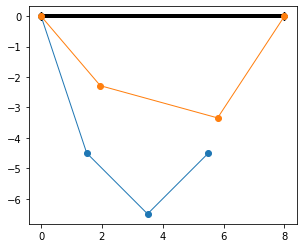

In [17]:
ax = plot_2masses(x0, L, W)
ax = plot_2masses(x, L, W, ax=ax)

Pretty-print the solution (angles in degrees):

In [18]:
def pretty_print(x):
    theta = np.rad2deg(np.arcsin(x[0:3]))
    tensions = x[6:]
    print("theta1 = {0[0]:.1f} \t theta2 = {0[1]:.1f} \t theta3 = {0[2]:.1f}".format(theta))
    print("T1     = {0[0]:.1f} \t T2     = {0[1]:.1f} \t T3     = {0[2]:.1f}".format(tensions))

In [19]:
print("Starting values")
pretty_print(x0)
print()
print("Solution")
pretty_print(x)

Starting values
theta1 = nan 	 theta2 = 30.0 	 theta3 = 30.0
T1     = 1.0 	 T2     = 1.0 	 T3     = 1.0

Solution
theta1 = 49.6 	 theta2 = 15.4 	 theta3 = 56.7
T1     = 17.2 	 T2     = 11.5 	 T3     = 20.3


/Users/oliver/anaconda3/envs/phy494/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arcsin
  


#### Show intermediate steps
Create a new function `newton_raphson_intermediates()` based on `newton_raphson()` that returns *all* trial `x` values including the last one.

In [20]:
def newton_raphson_intermediates(f, x, Nmax=100, tol=1e-8, h=1e-5):
    """n-D Newton-Raphson: solves f(x) = 0.
    
    Iterate until |f(x)| < tol or nmax steps.
    
    Returns all intermediates.
    """
    intermediates = []
    x = x.copy()
    for istep in range(Nmax):
        fx = f(x)
        if np.linalg.norm(fx) < tol:
            break
        J = Jacobian(f, x, h=h)
        Delta_x = np.linalg.solve(J, -fx)
        intermediates.append(x.copy())
        x += Delta_x
    else:
        print("Newton-Raphson: no root found after {0} iterations (eps={1}); "
            "best guess is {2} with error {3}".format(Nmax, tol, x, fx))
    return np.array(intermediates)

Visualize the intermediate configurations:

In [21]:
x_series = newton_raphson_intermediates(fLW, x0)

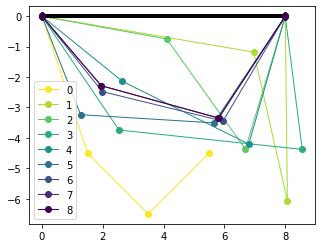

In [22]:
ax = plt.subplot(111)
ax.set_prop_cycle("color", [plt.cm.viridis_r(i) for i in np.linspace(0, 1, len(x_series))])
for iteration, x in enumerate(x_series):
    plot_2masses(x, L, W, label=str(iteration), ax=ax)
ax.legend(loc="best");

It's convenient to turn the above plotting code into a function that we can reuse:

In [23]:
def plot_series(x_series, L, W):
    """Plot all N masses/strings solution vectors in x_series (N, 9) array"""
    ax = plt.subplot(111)
    ax.set_prop_cycle("color", [plt.cm.viridis_r(i) for i in np.linspace(0, 1, len(x_series))])
    for iteration, x in enumerate(x_series):
        plot_2masses(x, L, W, label=str(iteration), ax=ax)
    ax.legend(loc="best")
    return ax

## Additional work
Try different masses, e.g. M1 = M2 = 10, or M1= 0 , M2 = 10.

Use nicer starting parameters that already fulfill the angle equations (7) - (9) (but it works with pretty much any guess):

In [24]:
# initial parameters
theta0 = np.deg2rad([45, 45, 90])
T0 = np.array([1, 1, 2])
x0 = np.concatenate([np.sin(theta0), np.cos(theta0), T0])

### M1 = M2 = 10 

In [25]:
W_2 = np.array([10, 10])
def fLW_2(x, L=L, W=W_2):
    return f_2masses(x, L, W)

In [26]:
x_series_2 = newton_raphson_intermediates(fLW_2, x0)
pretty_print(x_series_2[-1])

theta1 = 57.9 	 theta2 = 8.8 	 theta3 = 52.1
T1     = 13.1 	 T2     = 7.0 	 T3     = 11.3


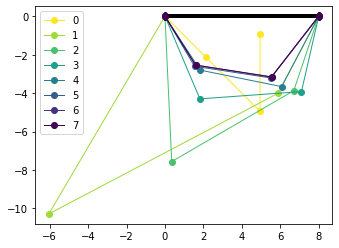

In [27]:
plot_series(x_series_2, L, W_2)

### M1 = 0, M2 = 10 

In [28]:
W_3 = np.array([0, 10])
def fLW_3(x):
    return f_2masses(x, L=L, W=W_3)

In [29]:
x_series_3 = newton_raphson_intermediates(fLW_3, x0)
pretty_print(x_series_3[-1])

theta1 = 30.0 	 theta2 = 30.0 	 theta3 = 61.0
T1     = 4.8 	 T2     = 4.8 	 T3     = 8.7


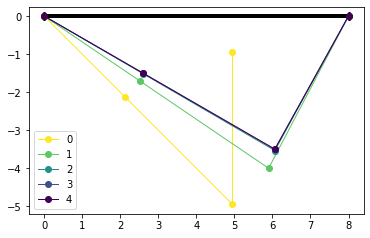

In [30]:
plot_series(x_series_3, L, W_3)